**CREATING THE GRAPH**

In [90]:
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter
import numpy as np

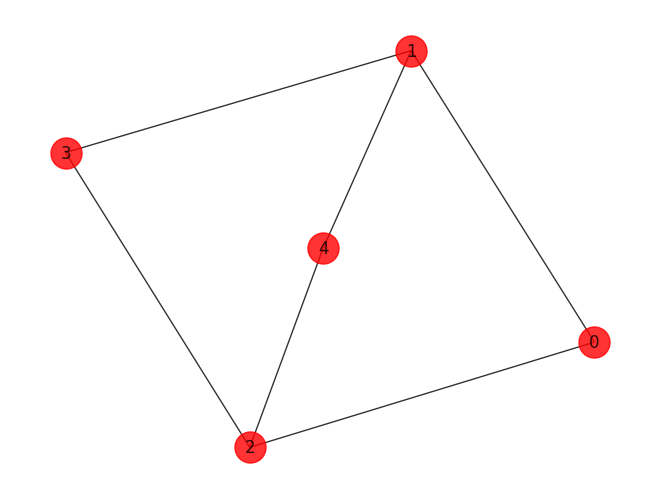

In [147]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0, 1), (0, 2), (3, 1), (3, 2),(4,1),(4,2)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500,node_color='#ff0000')

** SIMPLE QAOA CIRCUIT EXAMPLE **

In [148]:
init_circ = QuantumCircuit(nqubits)
for q in range(nqubits):
    init_circ.h(q)

# Define the mixer unitary circuit
beta = Parameter('beta')
mixer_circ = QuantumCircuit(nqubits)
for q in range(nqubits):
    mixer_circ.rx(2*beta, q)

# Define the problem unitary circuit
gamma = Parameter('gamma')
problem_circ = QuantumCircuit(nqubits)
for edge in list(G.edges()):
    problem_circ.rzz(2*gamma, edge[0],edge[1])
    problem_circ.barrier()

# Combine the circuits to form the full QAOA circuit
p = 3
qaoa_circ = init_circ
for i in range(p):
       qaoa_circ = qaoa_circ.compose(problem_circ)
       qaoa_circ = qaoa_circ.compose(mixer_circ)

# Draw the circuit
qaoa_circ.draw()

┌───┐               ░                ░                ░                ░ »
q_0: ┤ H ├─■─────────────░──■─────────────░────────────────░────────────────░─»
     ├───┤ │ZZ(2*gamma)  ░  │             ░                ░                ░ »
q_1: ┤ H ├─■─────────────░──┼─────────────░──■─────────────░──■─────────────░─»
     ├───┤               ░  │ZZ(2*gamma)  ░  │             ░  │             ░ »
q_2: ┤ H ├───────────────░──■─────────────░──┼─────────────░──┼─────────────░─»
     ├───┤               ░                ░  │ZZ(2*gamma)  ░  │             ░ »
q_3: ┤ H ├───────────────░────────────────░──■─────────────░──┼─────────────░─»
     ├───┤               ░                ░                ░  │ZZ(2*gamma)  ░ »
q_4: ┤ H ├───────────────░────────────────░────────────────░──■─────────────░─»
     └───┘               ░                ░                ░                ░ »
«                    ░                ░ ┌────────────┐               ░ »
«q_0: ───────────────░────────────────░─┤ Rx(2*beta) ├─■─────────────░─»
«                    ░                ░ ├────────────┤ │ZZ(2*gamma)  ░ »
«q_1: ───────────────░────────────────░─┤ Rx(2*beta) ├─■─────────────░─»
«                    ░                ░ ├────────────┤               ░ »
«q_2: ─■─────────────░──■─────────────░─┤ Rx(2*beta) ├───────────────░─»
«      │ZZ(2*gamma)  ░  │             ░ ├────────────┤               ░ »
«q_3: ─■─────────────░──┼─────────────░─┤ Rx(2*beta) ├───────────────░─»
«                    ░  │ZZ(2*gamma)  ░ ├────────────┤               ░ »
«q_4: ───────────────░──■─────────────░─┤ Rx(2*beta) ├───────────────░─»
«                    ░                ░ └────────────┘               ░ »
«                    ░                ░                ░                ░ »
«q_0: ─■─────────────░────────────────░────────────────░────────────────░─»
«      │             ░                ░                ░                ░ »
«q_1: ─┼─────────────░──■─────────────░──■─────────────░────────────────░─»
«      │ZZ(2*gamma)  ░  │             ░  │             ░                ░ »
«q_2: ─■─────────────░──┼─────────────░──┼─────────────░──■─────────────░─»
«                    ░  │ZZ(2*gamma)  ░  │             ░  │ZZ(2*gamma)  ░ »
«q_3: ───────────────░──■─────────────░──┼─────────────░──■─────────────░─»
«                    ░                ░  │ZZ(2*gamma)  ░                ░ »
«q_4: ───────────────░────────────────░──■─────────────░────────────────░─»
«                    ░                ░                ░                ░ »
«                    ░ ┌────────────┐               ░                ░ »
«q_0: ───────────────░─┤ Rx(2*beta) ├─■─────────────░──■─────────────░─»
«                    ░ ├────────────┤ │ZZ(2*gamma)  ░  │             ░ »
«q_1: ───────────────░─┤ Rx(2*beta) ├─■─────────────░──┼─────────────░─»
«                    ░ ├────────────┤               ░  │ZZ(2*gamma)  ░ »
«q_2: ─■─────────────░─┤ Rx(2*beta) ├───────────────░──■─────────────░─»
«      │             ░ ├────────────┤               ░                ░ »
«q_3: ─┼─────────────░─┤ Rx(2*beta) ├───────────────░────────────────░─»
«      │ZZ(2*gamma)  ░ ├────────────┤               ░                ░ »
«q_4: ─■─────────────░─┤ Rx(2*beta) ├───────────────░────────────────░─»
«                    ░ └────────────┘               ░                ░ »
«                    ░                ░                ░                ░ »
«q_0: ───────────────░────────────────░────────────────░────────────────░─»
«                    ░                ░                ░                ░ »
«q_1: ─■─────────────░──■─────────────░────────────────░────────────────░─»
«      │             ░  │             ░                ░                ░ »
«q_2: ─┼─────────────░──┼─────────────░──■─────────────░──■─────────────░─»
«      │ZZ(2*gamma)  ░  │             ░  │ZZ(2*gamma)  ░  │             ░ »
«q_3: ─■─────────────░──┼─────────────░──■─────────────░──┼─────────────░─»
«                    ░  │ZZ(2*gamma)  ░                ░  │ZZ(2*gamma)  ░ »

**QAOA CIRCUIT CODE** 

In [149]:
def QAOA(G, arr_of_params):
    nqubits = len(G.nodes())
    num_initaries = len(arr_of_params)//2  


    qc = QuantumCircuit(nqubits)
    
    beta = arr_of_params[:num_initaries]
    gamma = arr_of_params[num_initaries:]
    # Add the problem and mixer unitaries
    for i in range(0,nqubits):
        qc.h(i)

    for irep in range(0, num_initaries):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    # Add measurement
    qc.measure_all()
    
    return qc

**EXPECTATION CALCULATION**

In [150]:
def EXPECTATION(G, steps=400):
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = steps
    
    def circuit(theta):
        
        qc = QAOA(G, theta)
        counts = backend.run(qc,seed_simulator=10, nshots=1000).result().get_counts()
        
        avg = 0
        sum_count = 0
        for bitstring, count in counts.items():

            obj = 0
            for i, j in G.edges():
                if bitstring[::-1][i] != bitstring[::-1][j]:
                    obj -= 1
            
 
            avg += obj * count
            sum_count += count
        
        return avg/sum_count
    
    return circuit

**MINIMIZER** 

In [151]:


expectation = EXPECTATION(G)
res = minimize(expectation, 
               [10.0, 10.0], 
               method='Nelder-Mead', 
               options={'maxiter': 100, 'disp': True})



Optimization terminated successfully.
         Current function value: -4.293945
         Iterations: 30
         Function evaluations: 68


**INITIALIZING THE PARAMETER (beta,gamma)**

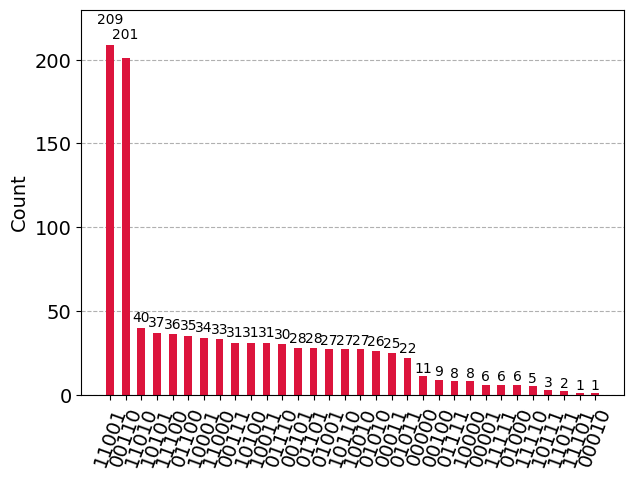

In [152]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 1000

qc_res = QAOA(G, res.x)
# print(qc_res)
counts = backend.run(qc_res, seed_simulator=10).result().get_counts()
# for i, j in keys(counts),values(counts):
#   if(j>60):
#     print(i,j)
plot_histogram(counts,color=['crimson'],sort='value_desc')